In [1]:
# tensorflow stuffs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# sklearn
from sklearn.base import BaseEstimator
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.utils.fixes import loguniform

In [76]:
class ANN_classifier(BaseEstimator):
    def __init__(self, lr=0.001):
        self.lr = lr
        
    # needed for grid search
    def get_params(self, deep=True):
        return {"lr": self.lr}     
        
    # needed for grid search
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        # return self to allow chaining
        return self
    
    def build_model(self, lr=0.001):
        self.model = Sequential([
            Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'),
            Dense(1, activation='sigmoid')
        ])
        self.optimizer = SGD(learning_rate=lr, momentum=0.9)       
        self.model.compile(loss='binary_crossentropy', optimizer=self.optimizer, metrics=['accuracy'])

    # fit model
    def fit(self, X_train, Y_train, XY_valid=None, epochs=50):
        self.build_model(lr=self.lr)
        self.history = self.model.fit(X_train, Y_train,
                                      epochs=epochs,
                                      validation_data=XY_valid,
                                      verbose=0)
        return self
                  
    def predict_proba(self, X):
        return self.model.predict(X)
    
    def predict(self, X):
        return (self.predict_proba(X)>=0.5).astype(int)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return f1_score(y_pred=y_pred, y_true=y)

# Make dummy dataset

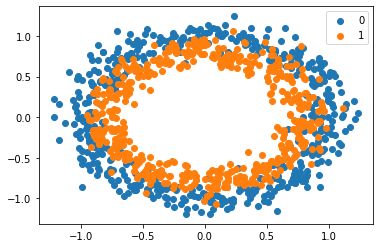

In [77]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt

# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# select indices of points with each class label
fig, ax = plt.subplots()
for i in range(2):
    samples_ix = np.where(y == i)
    ax.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
ax.legend()
plt.show()

In [78]:
# keep 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [79]:
model = ANN_classifier()

In [80]:
# distributions for hyperparameters, here only the learning rate
params = {
    "lr": loguniform(a=10**-4, b=10**-3)
}

In [81]:
# 10 random sampling of parameters, each tested through 5-fold cross-validation
search = RandomizedSearchCV(
    estimator=model, 
    param_distributions=params,
    n_iter=10,
    cv=5
)

In [82]:
CV = search.fit(X_train, y_train, epochs=10)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/tmp/ipykernel_72/3555226899.py", line 27, in fit
    self.history = self.model.fit(X_train, Y_train,
  File "/opt/conda/lib/python3.9/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/opt/conda/lib/python3.9/site-packages/tensorflow/python/eager/

ValueError: in user code:

    /opt/conda/lib/python3.9/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.9/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.9/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.9/site-packages/keras/engine/training.py:792 train_step
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    /opt/conda/lib/python3.9/site-packages/keras/engine/compile_utils.py:436 update_state
        self.build(y_pred, y_true)
    /opt/conda/lib/python3.9/site-packages/keras/engine/compile_utils.py:358 build
        self._metrics = tf.__internal__.nest.map_structure_up_to(y_pred, self._get_metric_objects,
    /opt/conda/lib/python3.9/site-packages/tensorflow/python/util/nest.py:1376 map_structure_up_to
        return map_structure_with_tuple_paths_up_to(
    /opt/conda/lib/python3.9/site-packages/tensorflow/python/util/nest.py:1474 map_structure_with_tuple_paths_up_to
        results = [
    /opt/conda/lib/python3.9/site-packages/tensorflow/python/util/nest.py:1475 <listcomp>
        func(*args, **kwargs) for args in zip(flat_path_gen, *flat_value_gen)
    /opt/conda/lib/python3.9/site-packages/tensorflow/python/util/nest.py:1378 <lambda>
        lambda _, *values: func(*values),  # Discards the path arg.
    /opt/conda/lib/python3.9/site-packages/keras/engine/compile_utils.py:482 _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    /opt/conda/lib/python3.9/site-packages/keras/engine/compile_utils.py:482 <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    /opt/conda/lib/python3.9/site-packages/keras/engine/compile_utils.py:501 _get_metric_object
        metric_obj = metrics_mod.get(metric)
    /opt/conda/lib/python3.9/site-packages/keras/metrics.py:3713 get
        return deserialize(str(identifier))
    /opt/conda/lib/python3.9/site-packages/keras/metrics.py:3669 deserialize
        return deserialize_keras_object(
    /opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:704 deserialize_keras_object
        raise ValueError(

    ValueError: Unknown metric function: f1_score. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


In [73]:
# best average cv score
CV.best_score_

0.7708070722159881

In [74]:
# final score on test dataset
CV.best_estimator_.score(X_test, y_test)

0.811111111111111